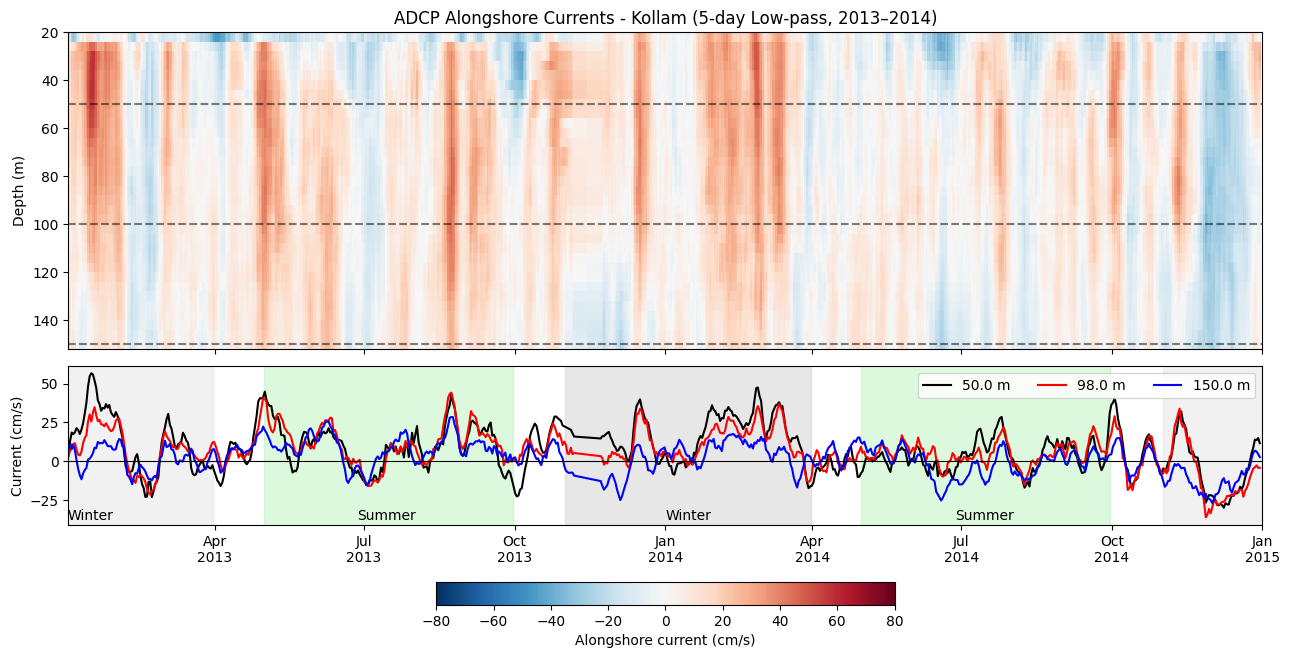

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# === File path (example: Kollam) ===
file = "West_Coast/Kollam/ADCP_OKD_2013_2018_ashr_cshr_daily.nc"

# Loading the dataset from a file
ds = xr.open_dataset(file, decode_times=True)

# Extracting time, depth, and alongshore current data from the dataset
time = ds["TAX1"].to_index()  # Converting time variable to a pandas DatetimeIndex
depth = ds["ZAX1_43"].values  # Getting depth values as a NumPy array
u_along = ds["ASOGD"].squeeze()  # Extracting alongshore current data and removing single-dimensional entries

# Replacing missing values with NaN without interpolating
u_along = u_along.where(np.isfinite(u_along))

# Applying a 5-day low-pass filter to smooth the alongshore current data
u_along_lp = u_along.rolling(TAX1=5, center=True).mean()

# Selecting data only for the years 2013 and 2014
sel = (time >= "2013-01-01") & (time <= "2014-12-31")
time_sel = time[sel]
u_along_lp = u_along_lp.sel(TAX1=slice("2013-01-01", "2014-12-31"))

# Limiting depth data to 150 meters or less
depth_mask = depth <= 150
depth = depth[depth_mask]
u_along_lp = u_along_lp[:, depth_mask]

# Ensuring the time dimension of u_along_lp matches time_sel by trimming
u_along_lp = u_along_lp.sel(TAX1=time_sel)  # Explicitly align time dimension

# Transposing the low-pass filtered data for plotting with pcolormesh
u_along_lp_plot = u_along_lp.T  # Shape should be (depth, time)

# === Plot ===
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(13, 7), sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

# Creating a meshgrid for time and depth to use in the contour plot
time_mesh, depth_mesh = np.meshgrid(time_sel, depth)

# Creating a time-depth contour plot for the top panel
pcm = ax1.pcolormesh(
    time_mesh, depth_mesh, u_along_lp_plot,
    cmap="RdBu_r", vmin=-80, vmax=80
)
ax1.invert_yaxis()  # Inverting y-axis to show deeper depths at the bottom
ax1.set_ylabel("Depth (m)")
ax1.set_title("ADCP Alongshore Currents - Kollam (5-day Low-pass, 2013–2014)")

# Adding dashed lines to indicate specific depth levels in the top panel
for d in [50, 100, 150]:
    ax1.axhline(d, color='k', linestyle='--', alpha=0.5)

# Plotting time series for selected depths in the bottom panel
depth_levels = [50, 100, 150]
colors = ["k", "r", "b"]

for d, c in zip(depth_levels, colors):
    idx = np.argmin(np.abs(depth - d))  # Finding the index of the closest depth
    ax2.plot(time_sel, u_along_lp[:, idx], color=c, label=f"{depth[idx]:.1f} m")

ax2.axhline(0, color="k", linewidth=0.8)  # Adding a horizontal line at 0 cm/s
ax2.set_ylabel("Current (cm/s)")
ax2.legend(loc="upper right", ncol=3)  # Adding a legend for depth levels

# Setting x-axis ticks and labels for both panels
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
    ax.set_xlim(time_sel[0], pd.Timestamp("2015-01-01"))  # Limiting x-axis to Jan 2015

# Shading summer and winter periods in the bottom panel
for year in [2013, 2014]:
    # Shading the summer period (May 1 to Sep 30) in light green
    ax2.axvspan(f"{year}-05-01", f"{year}-09-30", color="lightgreen", alpha=0.3)
    # Shading the winter period (Nov 1 to Mar 31) in light grey
    ax2.axvspan(f"{year}-11-01", f"{year+1}-03-31", color="lightgrey", alpha=0.3)
    ax2.axvspan(f"{year-1}-11-01", f"{year}-03-31", color="lightgrey", alpha=0.3)
    # Adding "Summer" label at -30 cm/s in the center of the summer period
    mid_summer = pd.Timestamp(f"{year}-07-15")  # Midpoint of May to Sep
    ax2.text(mid_summer, -35, "Summer", ha="center", va="center", color="black")
    # Adding "Winter" label at -30 cm/s in the center of the winter period
    mid_winter = pd.Timestamp(f"{year}-01-15")  # Midpoint of Nov to Mar
    ax2.text(mid_winter, -35, "Winter", ha="center", va="center", color="black")
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Adding a horizontal colorbar below both panels
cbar = fig.colorbar(
    pcm, ax=[ax1, ax2], orientation="horizontal",
    fraction=0.04, pad=0.1
)
cbar.set_label("Alongshore current (cm/s)")

plt.show()

> hi 
> 

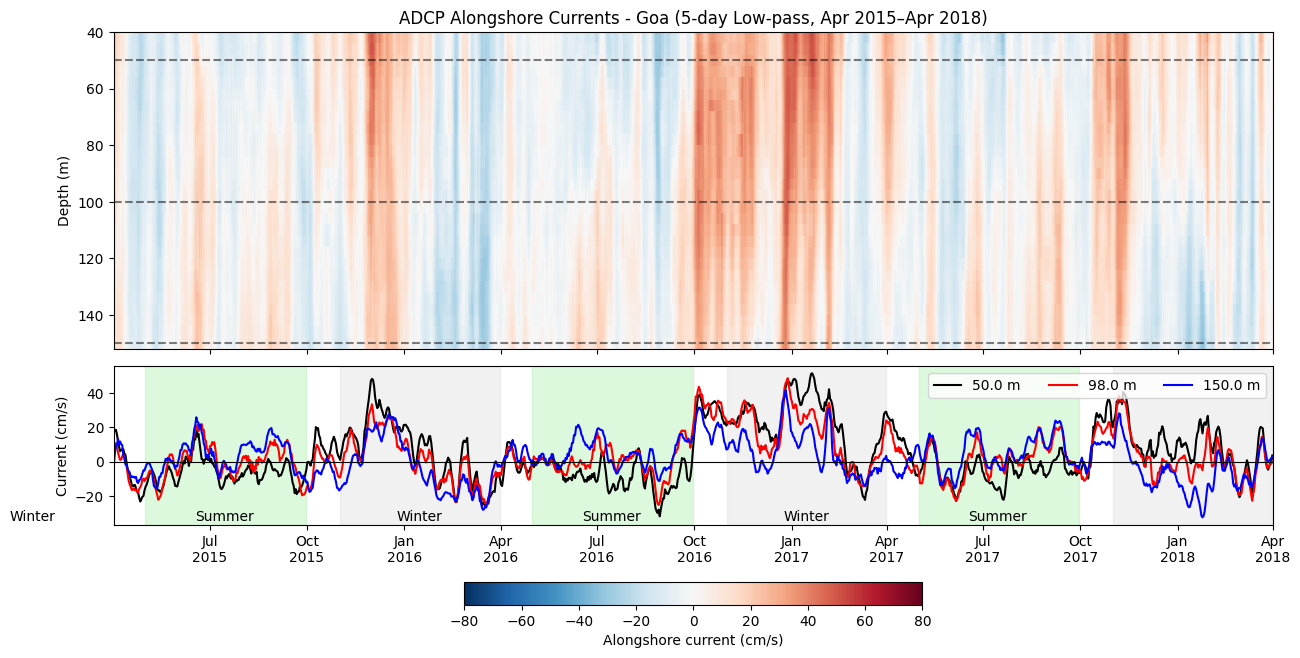

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# === File path (example: Goa) ===
file = "West_Coast/Goa/ADCP_OGD_2015_2018_ashr_cshr_daily.nc"

# Loading the dataset from a file
ds = xr.open_dataset(file, decode_times=True)

# Extracting time, depth, and alongshore current data from the dataset
time = ds["TAX1"].to_index()  # Converting time variable to a pandas DatetimeIndex
depth = ds["ZAX6_37"].values  # Getting depth values as a NumPy array
u_along = ds["ASOGD"].squeeze()  # Extracting alongshore current data and removing single-dimensional entries

# Replacing missing values with NaN without interpolating
u_along = u_along.where(np.isfinite(u_along))

# Applying a 5-day low-pass filter to smooth the alongshore current data
u_along_lp = u_along.rolling(TAX1=5, center=True).mean()

# Selecting data only for the years April 2015 to April 2018
sel = (time >= "2015-04-01") & (time <= "2018-04-01")
time_sel = time[sel]
u_along_lp = u_along_lp.sel(TAX1=slice("2015-04-01", "2018-04-01"))

# Limiting depth data to 150 meters or less
depth_mask = depth <= 150
depth = depth[depth_mask]
u_along_lp = u_along_lp[:, depth_mask]

# Ensuring the time dimension of u_along_lp matches time_sel by trimming
u_along_lp = u_along_lp.sel(TAX1=time_sel)  # Explicitly align time dimension

# Transposing the low-pass filtered data for plotting with pcolormesh
u_along_lp_plot = u_along_lp.T  # Shape should be (depth, time)

# === Plot ===
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(13, 7), sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

# Creating a meshgrid for time and depth to use in the contour plot
time_mesh, depth_mesh = np.meshgrid(time_sel, depth)

# Creating a time-depth contour plot for the top panel
pcm = ax1.pcolormesh(
    time_mesh, depth_mesh, u_along_lp_plot,
    cmap="RdBu_r", vmin=-80, vmax=80
)
ax1.invert_yaxis()  # Inverting y-axis to show deeper depths at the bottom
ax1.set_ylabel("Depth (m)")
ax1.set_title("ADCP Alongshore Currents - Goa (5-day Low-pass, Apr 2015–Apr 2018)")

# Adding dashed lines to indicate specific depth levels in the top panel
for d in [50, 100, 150]:
    ax1.axhline(d, color='k', linestyle='--', alpha=0.5)

# Plotting time series for selected depths in the bottom panel
depth_levels = [50, 100, 150]
colors = ["k", "r", "b"]

for d, c in zip(depth_levels, colors):
    idx = np.argmin(np.abs(depth - d))  # Finding the index of the closest depth
    ax2.plot(time_sel, u_along_lp[:, idx], color=c, label=f"{depth[idx]:.1f} m")

ax2.axhline(0, color="k", linewidth=0.8)  # Adding a horizontal line at 0 cm/s
ax2.set_ylabel("Current (cm/s)")
ax2.legend(loc="upper right", ncol=3)  # Adding a legend for depth levels

# Setting x-axis ticks and labels for both panels
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
    ax.set_xlim(time_sel[0], pd.Timestamp("2018-04-01"))  # Limiting x-axis to Apr 2018

# Shading summer and winter periods in the bottom panel
for year in [2015, 2016, 2017]:
    # Shading the summer period (May 1 to Sep 30) in light green
    ax2.axvspan(f"{year}-05-01", f"{year}-09-30", color="lightgreen", alpha=0.3)
    # Shading the winter period (Nov 1 to Mar 31) in light grey
    ax2.axvspan(f"{year}-11-01", f"{year+1}-03-31", color="lightgrey", alpha=0.3)
    # Adding "Summer" label at -35 cm/s in the center of the summer period
    mid_summer = pd.Timestamp(f"{year}-07-15")  # Midpoint of May to Sep
    ax2.text(mid_summer, -32, "Summer", ha="center", va="center", color="black")
    # Adding "Winter" label at -35 cm/s in the center of the winter period
    mid_winter = pd.Timestamp(f"{year}-01-15")  # Midpoint of Nov to Mar
    ax2.text(mid_winter, -32, "Winter", ha="center", va="center", color="black")
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Adding a horizontal colorbar below both panels
cbar = fig.colorbar(
    pcm, ax=[ax1, ax2], orientation="horizontal",
    fraction=0.04, pad=0.1
)
cbar.set_label("Alongshore current (cm/s)")

plt.show()

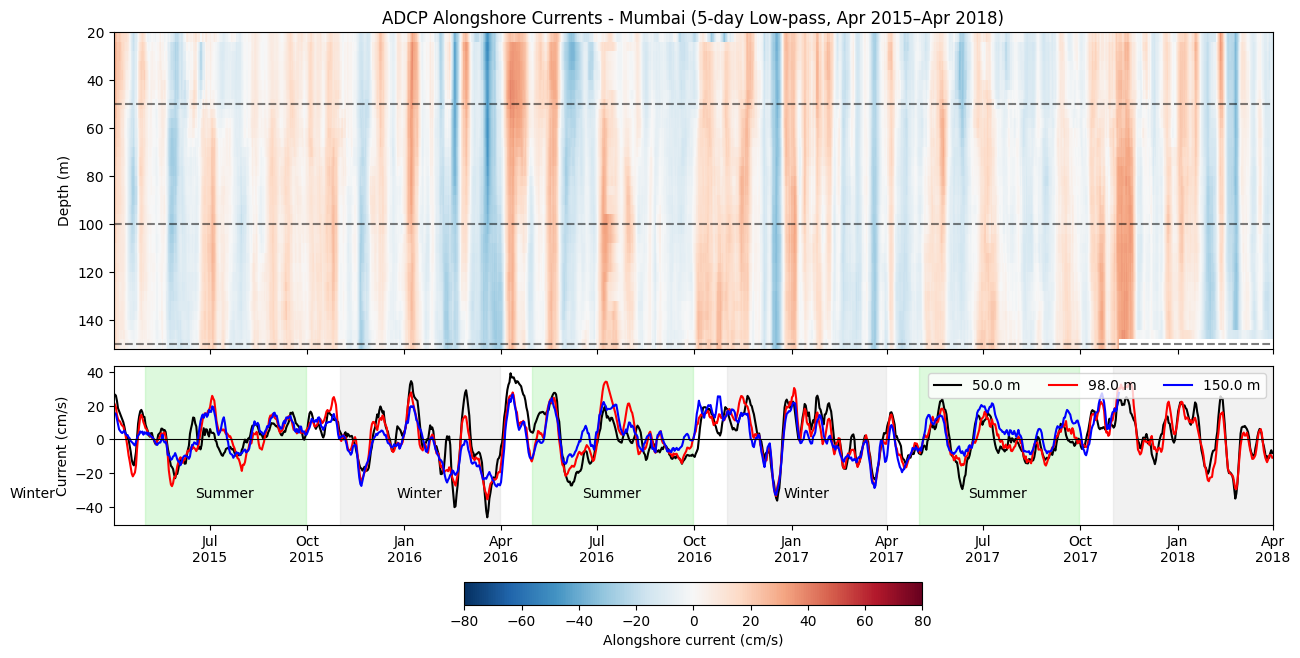

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# === File path (example: Goa) ===
file = "West_Coast/Mumbai/ADCP_OMD_2013_2018_ashr_cshr_daily.nc"

# Loading the dataset from a file
ds = xr.open_dataset(file, decode_times=True)

# Extracting time, depth, and alongshore current data from the dataset
time = ds["TAX1"].to_index()  # Converting time variable to a pandas DatetimeIndex
depth = ds["ZAX1_35"].values  # Getting depth values as a NumPy array
u_along = ds["ASOMD"].squeeze()  # Extracting alongshore current data and removing single-dimensional entries

# Replacing missing values with NaN without interpolating
u_along = u_along.where(np.isfinite(u_along))

# Applying a 5-day low-pass filter to smooth the alongshore current data
u_along_lp = u_along.rolling(TAX1=5, center=True).mean()

# Selecting data only for the years April 2015 to April 2018
sel = (time >= "2015-04-01") & (time <= "2018-04-01")
time_sel = time[sel]
u_along_lp = u_along_lp.sel(TAX1=slice("2015-04-01", "2018-04-01"))

# Limiting depth data to 150 meters or less
depth_mask = depth <= 150
depth = depth[depth_mask]
u_along_lp = u_along_lp[:, depth_mask]

# Ensuring the time dimension of u_along_lp matches time_sel by trimming
u_along_lp = u_along_lp.sel(TAX1=time_sel)  # Explicitly align time dimension

# Transposing the low-pass filtered data for plotting with pcolormesh
u_along_lp_plot = u_along_lp.T  # Shape should be (depth, time)

# === Plot ===
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(13, 7), sharex=True,
    gridspec_kw={'height_ratios': [2, 1]}
)

# Creating a meshgrid for time and depth to use in the contour plot
time_mesh, depth_mesh = np.meshgrid(time_sel, depth)

# Creating a time-depth contour plot for the top panel
pcm = ax1.pcolormesh(
    time_mesh, depth_mesh, u_along_lp_plot,
    cmap="RdBu_r", vmin=-80, vmax=80
)
ax1.invert_yaxis()  # Inverting y-axis to show deeper depths at the bottom
ax1.set_ylabel("Depth (m)")
ax1.set_title("ADCP Alongshore Currents - Mumbai (5-day Low-pass, Apr 2015–Apr 2018)")

# Adding dashed lines to indicate specific depth levels in the top panel
for d in [50, 100, 150]:
    ax1.axhline(d, color='k', linestyle='--', alpha=0.5)

# Plotting time series for selected depths in the bottom panel
depth_levels = [50, 100, 150]
colors = ["k", "r", "b"]

for d, c in zip(depth_levels, colors):
    idx = np.argmin(np.abs(depth - d))  # Finding the index of the closest depth
    ax2.plot(time_sel, u_along_lp[:, idx], color=c, label=f"{depth[idx]:.1f} m")

ax2.axhline(0, color="k", linewidth=0.8)  # Adding a horizontal line at 0 cm/s
ax2.set_ylabel("Current (cm/s)")
ax2.legend(loc="upper right", ncol=3)  # Adding a legend for depth levels

# Setting x-axis ticks and labels for both panels
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
    ax.set_xlim(time_sel[0], pd.Timestamp("2018-04-01"))  # Limiting x-axis to Apr 2018

# Shading summer and winter periods in the bottom panel
for year in [2015, 2016, 2017]:
    # Shading the summer period (May 1 to Sep 30) in light green
    ax2.axvspan(f"{year}-05-01", f"{year}-09-30", color="lightgreen", alpha=0.3)
    # Shading the winter period (Nov 1 to Mar 31) in light grey
    ax2.axvspan(f"{year}-11-01", f"{year+1}-03-31", color="lightgrey", alpha=0.3)
    # Adding "Summer" label at -35 cm/s in the center of the summer period
    mid_summer = pd.Timestamp(f"{year}-07-15")  # Midpoint of May to Sep
    ax2.text(mid_summer, -32, "Summer", ha="center", va="center", color="black")
    # Adding "Winter" label at -35 cm/s in the center of the winter period
    mid_winter = pd.Timestamp(f"{year}-01-15")  # Midpoint of Nov to Mar
    ax2.text(mid_winter, -32, "Winter", ha="center", va="center", color="black")
plt.tight_layout(rect=[0, 0, 1, 0.95])
# Adding a horizontal colorbar below both panels
cbar = fig.colorbar(
    pcm, ax=[ax1, ax2], orientation="horizontal",
    fraction=0.04, pad=0.1
)
cbar.set_label("Alongshore current (cm/s)")

plt.show()